In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def load_img():
    img = np.zeros((600,600))
    cv2.putText(img,text="Random Text here",org=(50,300),fontFace=cv2.FONT_HERSHEY_PLAIN,fontScale = 5, color = (255,255,255),thickness = 5)
    
    return img

In [3]:
def display_img(img):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap="gray")

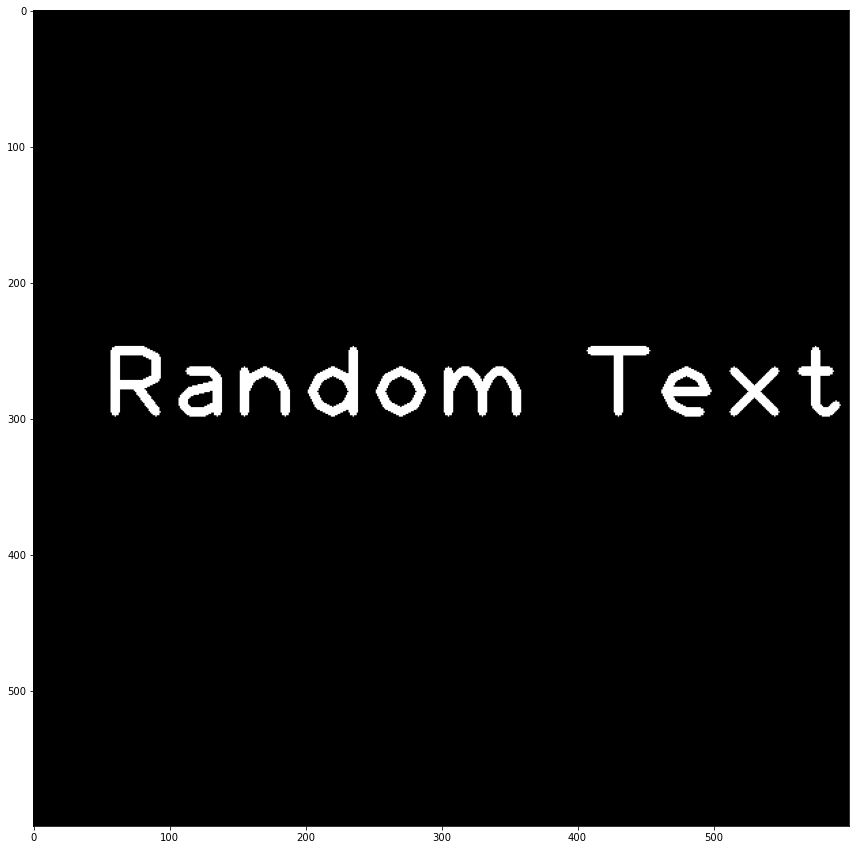

In [4]:
img = load_img()
display_img(img)

In [5]:
kernel = np.ones((5,5),dtype = np.uint8)

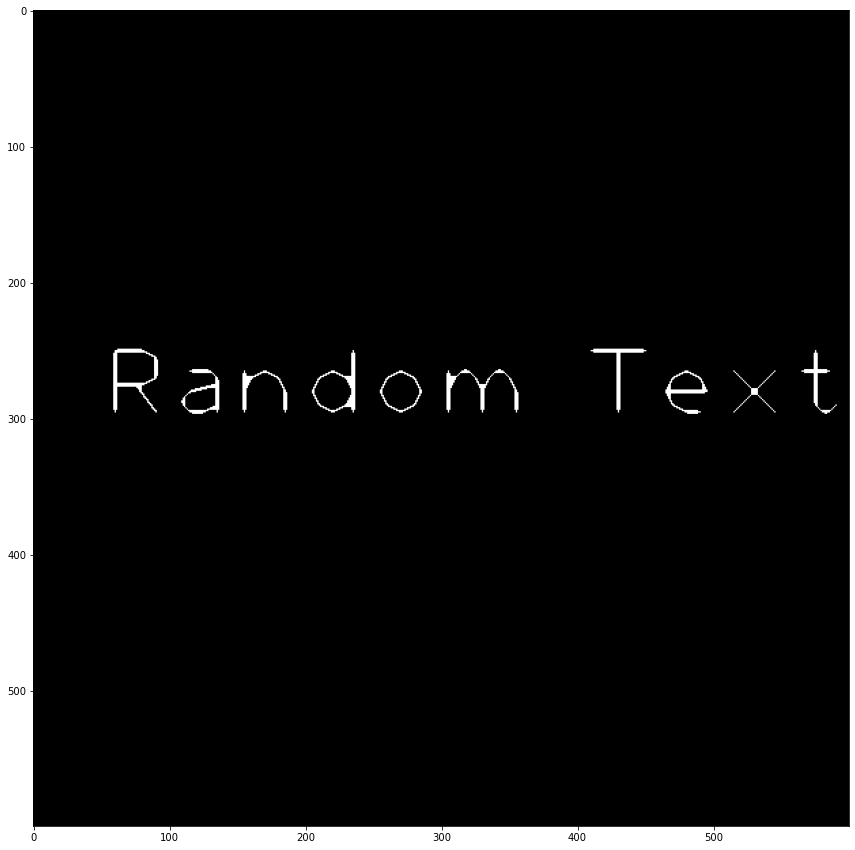

In [6]:
erode_img = cv2.erode(img,kernel,iterations = 1)
display_img(erode_img)

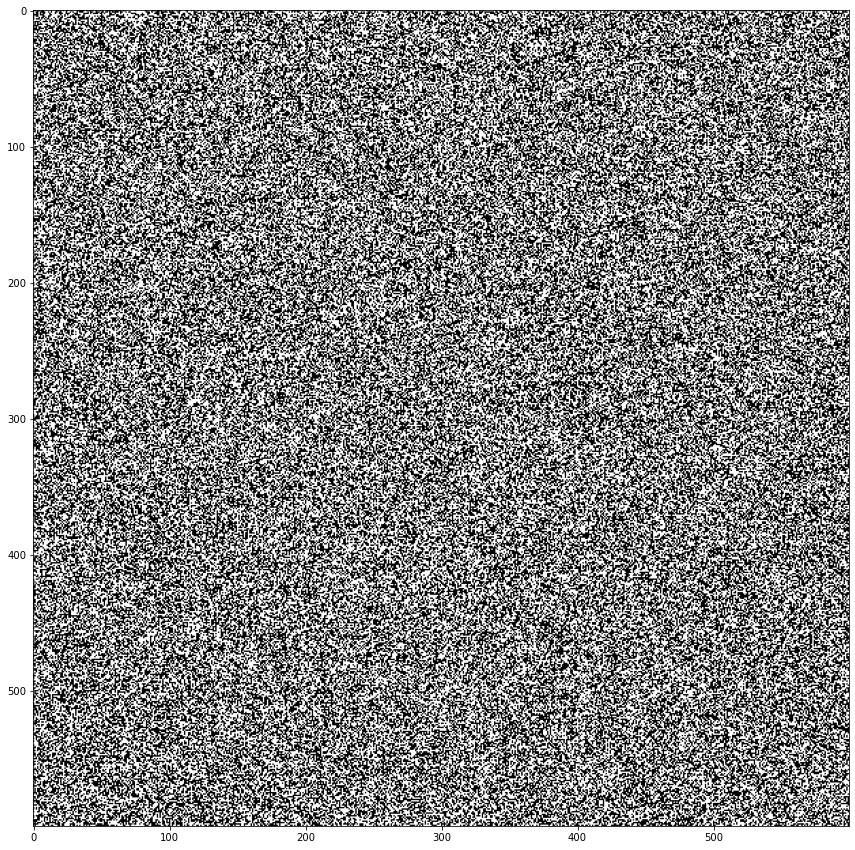

In [7]:
white_noise = np.random.randint(0,2,size=(600,600)) * 255
display_img(white_noise)

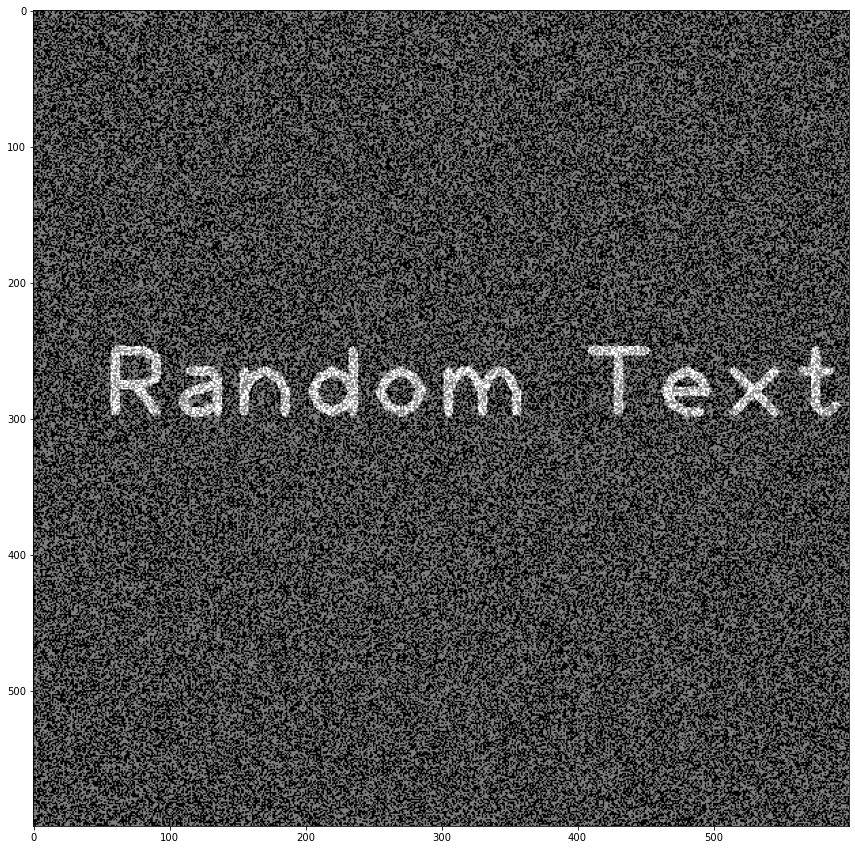

In [8]:
noisy_img = white_noise + img
display_img(noisy_img)

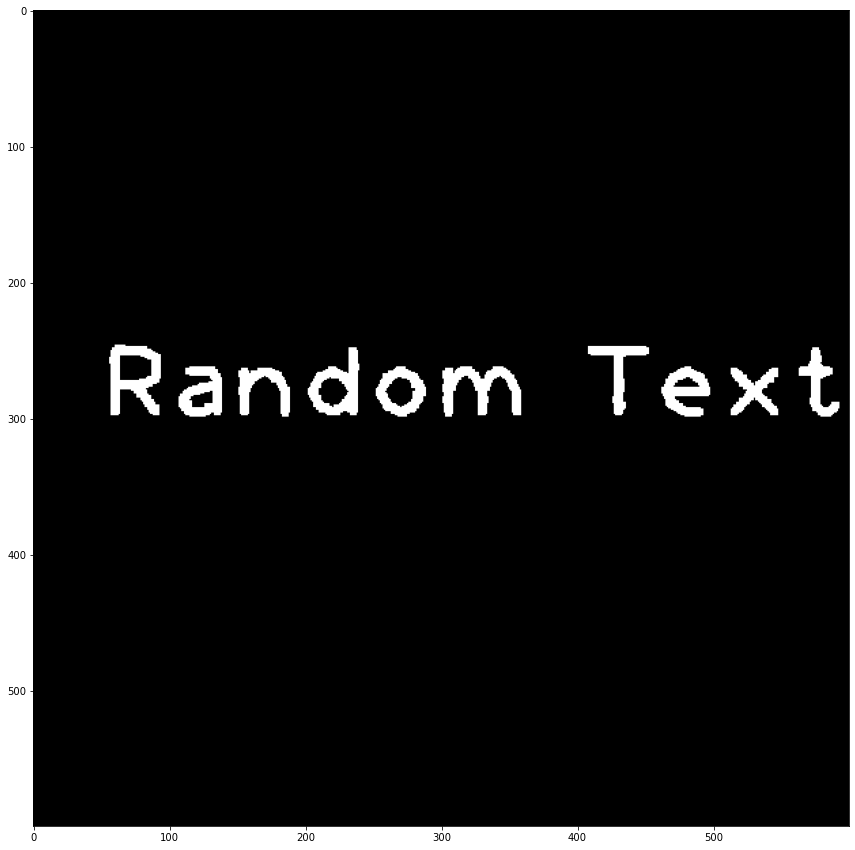

In [9]:
remove_noise_img = cv2.morphologyEx(noisy_img,cv2.MORPH_OPEN,kernel)
display_img(remove_noise_img)

array([[-255, -255,    0, ...,    0, -255,    0],
       [   0, -255,    0, ...,    0,    0, -255],
       [-255, -255, -255, ..., -255, -255,    0],
       ...,
       [   0, -255, -255, ..., -255, -255, -255],
       [   0,    0, -255, ...,    0, -255,    0],
       [   0,    0, -255, ...,    0,    0,    0]])

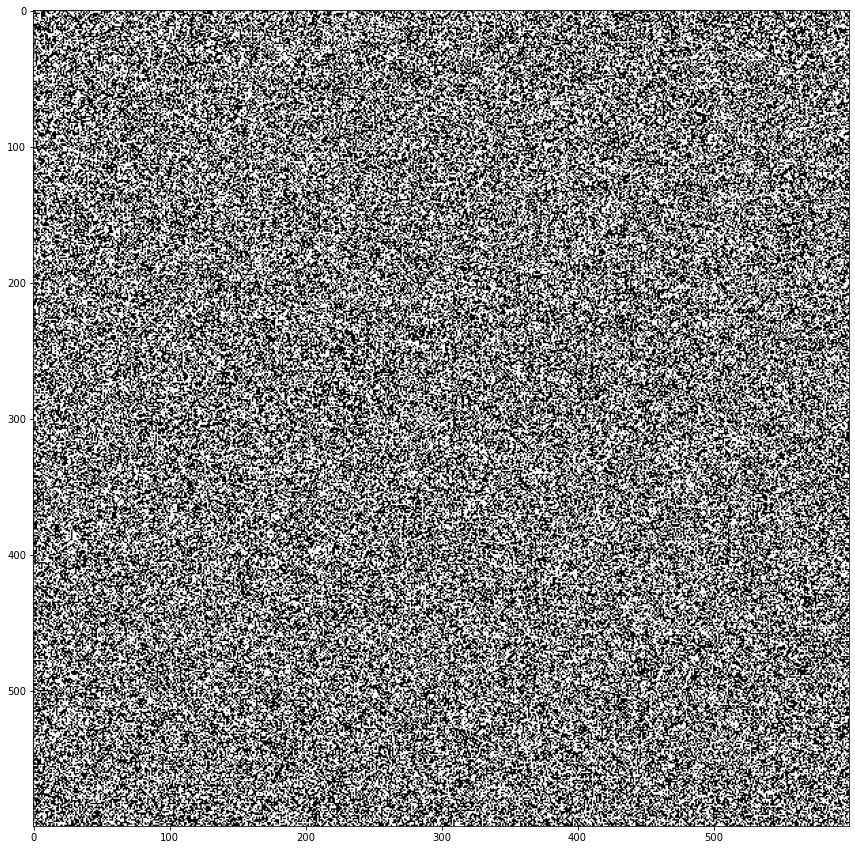

In [10]:
fg_noise = np.random.randint(0,2,(600,600)) * -255
display_img(fg_noise)
fg_noise

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

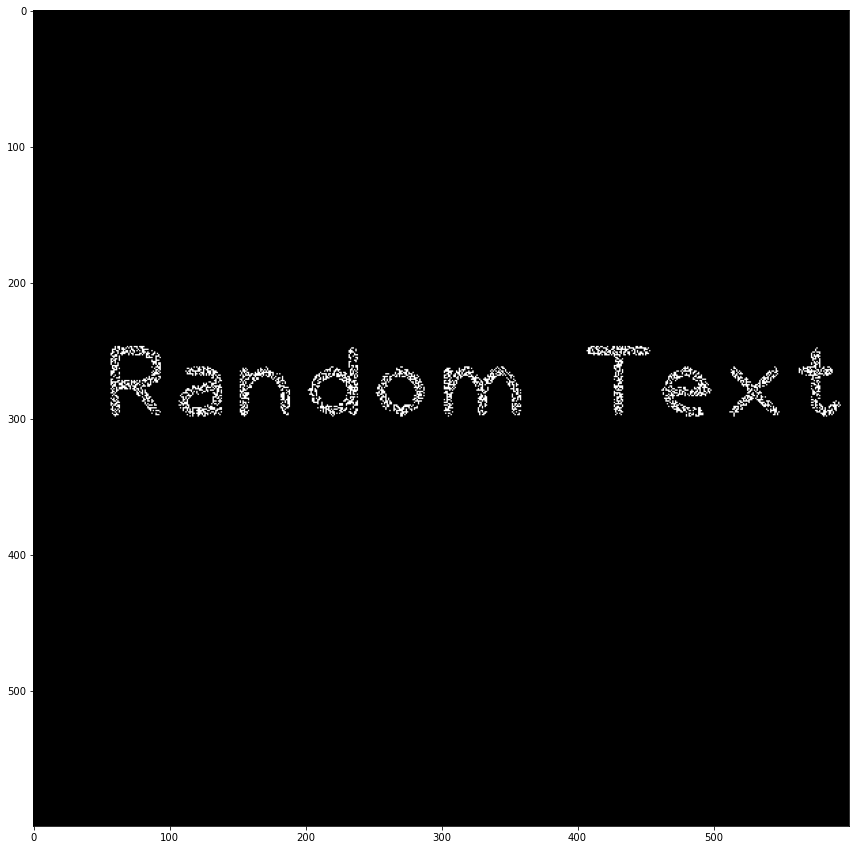

In [11]:
fg_noisy_img = fg_noise + img
fg_noisy_img[fg_noisy_img == -255] = 0
display_img(fg_noisy_img)
fg_noisy_img

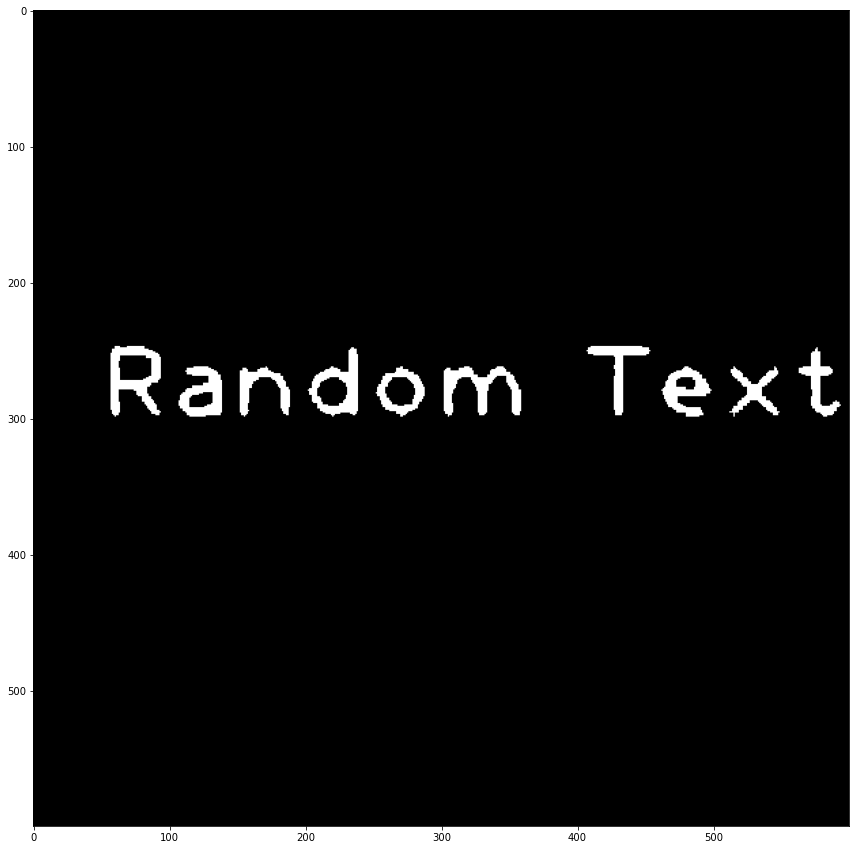

In [13]:
remove_noisy_img = cv2.morphologyEx(fg_noisy_img,cv2.MORPH_CLOSE,kernel)
display_img(remove_noisy_img)

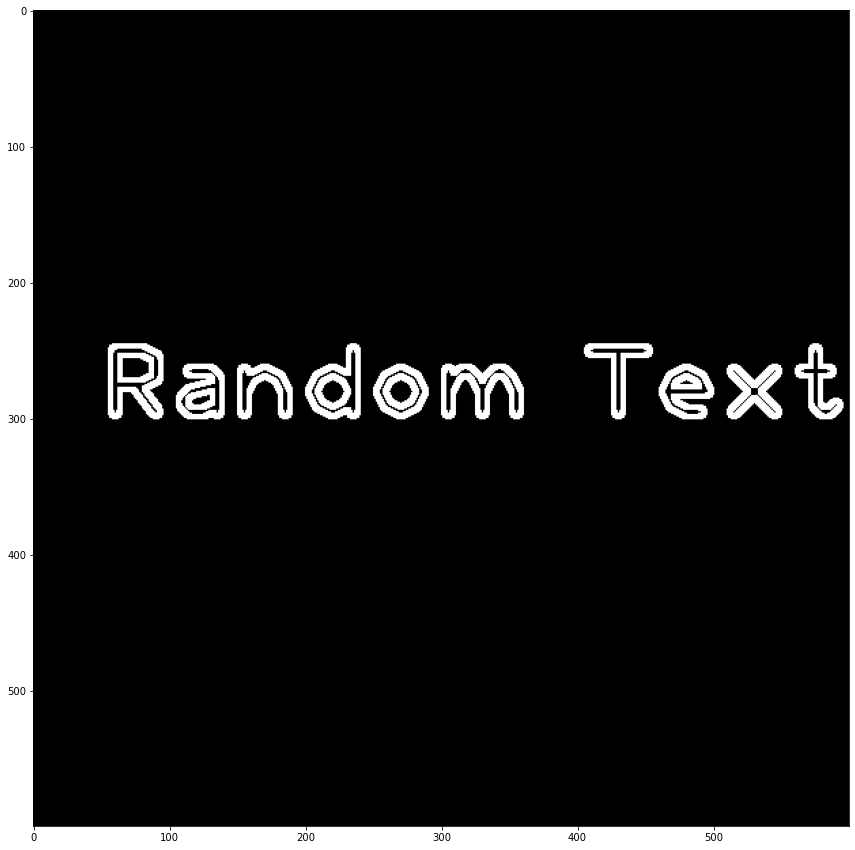

In [15]:
text_edges = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
display_img(text_edges)